# Лекция 6. Обучение с учителем

- Регрессионный анализ, многомерная регрессия 
- Дискриминантный анализ
- Метод опорных векторов
- Нейронные сети

## Регрессионный анализ, многомерная регрессия

Кроме решения задач кластеризации часто возникают и задачи классификации - отнесение объекта к одному из нескольких известных классов. Для этого обычно имеется некоторый набор данных, по которому нам известны характеристики некоторых объектов, а также принадлежность их к классам. Тогда требуется построить некоторую математическую модель, которая по заданным характеристикам объекта относит его к тому или иному классу. Фактически построение такой модели с целью минимизации ошибки и называется обучением.

Наиболее традиционным и в тоже время более тонким методом является **регрессионный анализ**, в котором по заданному вектору значений характеристик объекта (влияющих факторов) $X_j=(x_{j1},x_{j2},\ldots,x_{jn}), j=\overline{1\ldots k}$, а также по вектору значений результативного фактора $Y_j, j=\overline{1\ldots k}$ строиться функций $F(X_j)\sim Y_j$, которая минимизирует функционал:
$$\sum_{j=1}^k\left(Y_j-F(X_j)\right)^2\rightarrow\min$$

В качестве такой функции часто выбырают линейную функцию:
$F(X_j)=a_0+\sum_{i=1}^n a_i\cdot X_{ji}, \forall i=\overline{0,\ldots,n}: a_i=const$.

Можно рассмотреть частные случаи: $F(X_j)=a_0+a_1\cdot x_{j1}$, для которых используется метод наименьших квадратов.

$$G(a_0,a_1)=\sum_{j=1}^{k}\left(a_0+a_1\cdot x_{j1}-Y_j\right)^2\rightarrow\min$$


$$\frac{\partial{G(a_0,a_1)}}{\partial{a_0}}=\sum_{j=1}^{k}a_0+a_1\cdot\sum_{j=1}^{k}x_{j1}-\sum_{j=1}^{k}Y_j=0$$

$$\frac{\partial{G(a_0,a_1)}}{\partial{a_1}}=\sum_{j=1}^{k}a_0x_{j1}+a_1\cdot\sum_{j=1}^{k}x_{j1}^2-\sum_{j=1}^{k}Y_jx_{j1}=0$$

$$k\cdot a_0+\left(\sum_{j=1}^{k}x_{j1}\right)\cdot a_1=\sum_{j=1}^{k}Y_j$$

$$\left(\sum_{j=1}^kx_{j1}\right)\cdot a_0+\left(\sum_{j=1}^{k}x_{j1}^2\right)\cdot a_1=\sum_{j=1}^{k}Y_jx_{j1}$$

$$a_0=\frac{\begin{vmatrix}
\sum_{j=1}^{k}Y_j & \sum_{j=1}^{k}x_{j1}\\ 
\sum_{j=1}^{k}Y_jx_{j1} & \sum_{j=1}^{k}x_{j1}^2 \notag
\end{vmatrix}}{\begin{vmatrix}
k & \sum_{j=1}^{k}x_{j1}\\ 
\sum_{j=1}^kx_{j1} & \sum_{j=1}^{k}x_{j1}^2 \notag
\end{vmatrix}}$$
$$a_1=\frac{\begin{vmatrix}
k & \sum_{j=1}^{k}Y_j\\ 
\sum_{j=1}^{k}x_{j1} & \sum_{j=1}^{k}Y_jx_{j1} \notag
\end{vmatrix}}{\begin{vmatrix}
k & \sum_{j=1}^{k}x_{j1}\\ 
\sum_{j=1}^kx_{j1} & \sum_{j=1}^{k}x_{j1}^2 \notag
\end{vmatrix}}$$

Рассмотрим использование данного метода на примере.

In [5]:
install.packages("readxl")

Installing package into ‘/mnt/38fd9072-993c-442e-b6f8-1d98878f17c7/juna/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rematch’, ‘hms’, ‘cellranger’, ‘progress’


Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cloud.r-project.org/src/contrib/rematch_1.0.1.tar.gz': status was 'Server returned nothing (no headers, no data)'”


Error in download.file(url, destfile, method, mode = "wb", ...) : 
  не могу открыть URL 'https://cloud.r-project.org/src/contrib/rematch_1.0.1.tar.gz'


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘rematch’ failed”
Warning message in install.packages("readxl"):
“installation of package ‘cellranger’ had non-zero exit status”
Warning message in install.packages("readxl"):
“installation of package ‘readxl’ had non-zero exit status”


In [6]:
library(readxl)
D<-read_excel("data.xlsx")
View(D)

ERROR: Error in library(readxl): there is no package called ‘readxl’


In [4]:
Y=D$`Работающие активы`
X<-D$`Капитал`

[1] 20.7 19.9  9.3 59.3 24.7 47.7 24.2  7.8 38.3 10.3 35.7 20.7  8.2 10.2 23.5
[16] 55.8 10.3 16.7 15.8  6.8 22.4 13.6  9.9 24.0 23.0 75.1 56.2 60.7 14.8 41.5

In [5]:
#Выполним расчет определителей
chis1<-matrix(0,nrow=2,ncol=2)
znam<-matrix(0,nrow=2,ncol=2)
chis2<-matrix(0,nrow=2,ncol=2)
chis1[1,1]<-sum(Y);chis1[1,2]<-sum(X);chis1[2,1]<-sum(Y*X);chis1[2,2]<-sum(X^2)
znam[1,1]<-length(Y);znam[1,2]<-sum(X);znam[2,1]<-sum(X);znam[2,2]<-sum(X^2)
chis2[1,1]<-length(Y);chis2[1,2]<-sum(Y);chis2[2,1]<-sum(X);chis2[2,2]<-sum(X*Y)

a0<-det(chis1)/det(znam)
a1<-det(chis2)/det(znam)
print(c(a0,a1))

[1] -0.5429375  1.5572892


Конечно, такие расчеты в среде R проводить каждый раз не нужно. Есть встроенная функция lm:


In [9]:
help(lm)

lm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which lm is called."
subset,an optional vector specifying a subset of observations to be used in the fitting process.
weights,"an optional vector of weights to be used in the fitting process. Should be NULL or a numeric vector. If non-NULL, weighted least squares is used with weights weights (that is, minimizing sum(w*e^2)); otherwise ordinary least squares is used. See also ‘Details’,"
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
method,"the method to be used; for fitting, currently only method = ""qr"" is supported; method = ""model.frame"" returns the model frame (the same as with model = TRUE, see below)."
"model, x, y, qr","logicals. If TRUE the corresponding components of the fit (the model frame, the model matrix, the response, the QR decomposition) are returned."
singular.ok,logical. If FALSE (the default in S but not in R) a singular fit is an error.
contrasts,an optional list. See the contrasts.arg of model.matrix.default.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector of length equal to the number of cases. One or more offset terms can be included in the formula instead or as well, and if more than one are specified their sum is used. See model.offset."


In [8]:
res<-lm(Y~X)
res


Call:
lm(formula = Y ~ X)

Coefficients:
(Intercept)            X  
    -0.5429       1.5573  


Как видно, получились те же самые коэффициенты. Попробуем использовать результаты построенной модели. Для этих целей в среде R есть встроенная функция predict:

In [10]:
help(predict)

predict {stats},R Documentation
object,a model object for which prediction is desired.
...,additional arguments affecting the predictions produced.


In [13]:
g<-predict(res,data.frame(X,Y))
View(data.frame(X,Y,g))

,X,Y,g
,<dbl>,<dbl>,<dbl>
1,20.7,11.7,31.69295
2,19.9,19.8,30.44712
3,9.3,2.6,13.93985
4,59.3,43.6,91.80431
5,24.7,29.0,37.92211
6,47.7,98.5,73.73976
7,24.2,25.6,37.14346
8,7.8,6.2,11.60392
9,38.3,79.8,59.10124


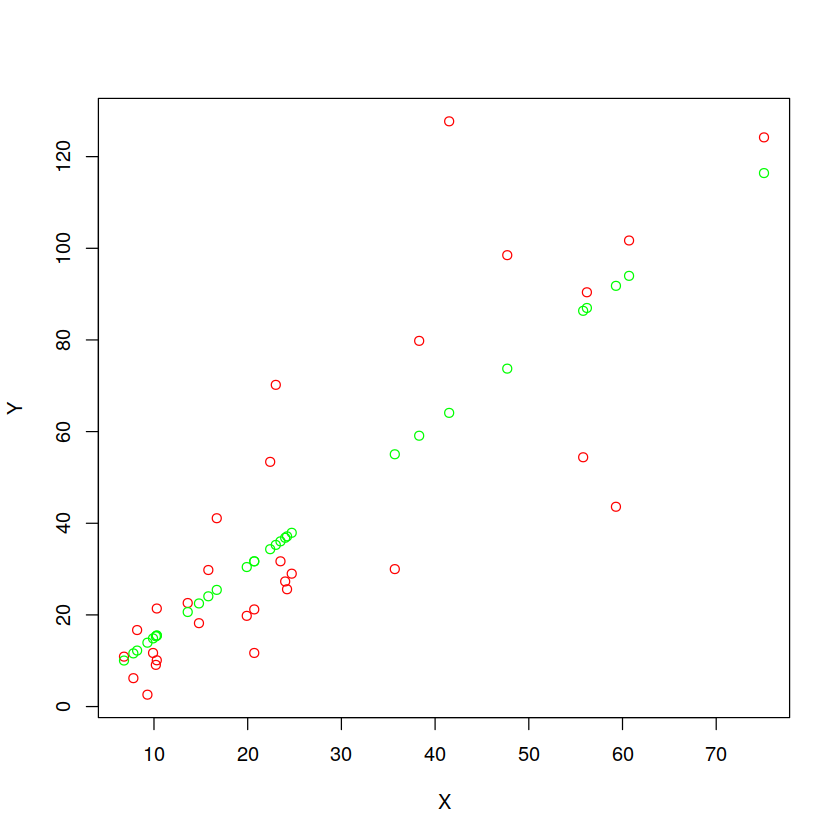

In [17]:
plot(X,Y, col="red")
points(X, g, col="green")

Как видно из графика, имеется довольно сильный разброс значений относительно модельных. Качество модели можно оценить уже рассмотренным ранее коэффициентом детерминации:

In [20]:
summary(res)


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.204 -10.253  -3.740   7.262  63.615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.5429     6.7379  -0.081    0.936    
X             1.5573     0.2061   7.556 3.13e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.97 on 28 degrees of freedom
Multiple R-squared:  0.671,	Adjusted R-squared:  0.6592 
F-statistic:  57.1 on 1 and 28 DF,  p-value: 3.13e-08


Функция lm также легко позволяет строить многофакторные линейные модели:

In [22]:
Y=D$`Работающие активы`
X1<-D$`Капитал`
X2<-D$`Уставной капитал`

In [23]:
res<-lm(Y~X1+X2,data.frame(Y,X1,X2))
res


Call:
lm(formula = Y ~ X1 + X2, data = data.frame(Y, X1, X2))

Coefficients:
(Intercept)           X1           X2  
     -4.583        1.397        1.001  


In [24]:
g<-predict(res,data.frame(X1, X2,Y))
View(data.frame(Y,g))

,Y,g
,<dbl>,<dbl>
1,11.7,26.747448
2,19.8,40.746745
3,2.6,11.116406
4,43.6,80.390216
5,29.0,53.061108
6,98.5,80.798339
7,25.6,34.541983
8,6.2,8.519598
9,79.8,55.748309


In [25]:
summary(res)


Call:
lm(formula = Y ~ X1 + X2, data = data.frame(Y, X1, X2))

Residuals:
    Min      1Q  Median      3Q     Max 
-36.790  -9.422  -1.561   7.537  62.174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.5833     7.2505  -0.632    0.533    
X1            1.3975     0.2336   5.982 2.22e-06 ***
X2            1.0011     0.7261   1.379    0.179    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.64 on 27 degrees of freedom
Multiple R-squared:  0.6926,	Adjusted R-squared:  0.6698 
F-statistic: 30.42 on 2 and 27 DF,  p-value: 1.213e-07


## Дискриминантный анализ

Для повышения точности можно загрубить цель предсказания, например, разбить значения переменной Y на квартили и пытыться предсказать, в какой квартиль мы попадем при том или ином значении показателей X1, X2. В этом случае мы приходим к идеям **дискриминантного анализа** - один из методов многомерного анализа для классификации объектов.

В среде R для реализации дискриминантного анализа используется функция lda, входящую в библиотеку MASS.

Рассмотрим использование дискриминантного анализа на примере датасета iris.


In [26]:
#install.packages("MASS")

Installing package into ‘/home/juna/R/x86_64-pc-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)



In [28]:
library(MASS)

In [34]:
iris<-read.csv("iris.csv")
colnames(iris)<-c("№","sl","sw","pl","pw", "class")
View(iris)

№,sl,sw,pl,pw,class
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Обычно для построения модели проводят разбиение всех данных на обучающую и тестовую выборку. Как правило, обучающая выборка составляет 75-80% от объема исходных данных, хотя каких-то строгих правил в этом отношении не существует. На обучающей выборке строят модель, на тестовой выборке проверяют ее адекватность. 

In [36]:
#Формирование обучающей и тестовой выборок
x<-c(1:150)
y<-sample(x,floor(150*0.8))
z<-setdiff(x,y)
D_teach<-iris[y,]
D_test<-iris[z,]

In [37]:
res<-lda(class~sl+sw+pl+pw,D_teach)
res

Call:
lda(class ~ sl + sw + pl + pw, data = D_teach)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3583333  0.3250000  0.3166667 

Group means:
                 sl       sw       pl        pw
setosa     5.002326 3.416279 1.462791 0.2395349
versicolor 5.928205 2.797436 4.258974 1.3384615
virginica  6.576316 3.002632 5.505263 2.0368421

Coefficients of linear discriminants:
          LD1        LD2
sl  0.6650693  0.2681216
sw  1.6575527  1.7788305
pl -2.3981538 -1.3603738
pw -2.5434975  3.4208385

Proportion of trace:
   LD1    LD2 
0.9926 0.0074 

In [41]:
g<-predict(res,D_test)
View(data.frame(D_test$class,g$class))

D_test.class,g.class
<fct>,<fct>
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
versicolor,versicolor
versicolor,versicolor


## Метод опорных векторов

Кроме рассмотренный методов в последнее время разработано множество более продвинутых методов многомерного анализа.

Один из таких методов является **метод опорных векторов**.

В этом методе задача классификации состоит в поиске гиперплоскости в  $n$-мерном пространстве, разделяющей точки одного класса от точек другого класса. Метод опорных вектров базируется на постулате, что наилучшая разделяющая гиперплоскость отстоит максимально далеко от ближайших до нее точек обоих классов, тогда для оценки качества разделения будем искать две гиперплоскости максимально близкие к точках двух классов и параллельные искомой разделяющей гиперплоскости. Ясно, что для улучшения разделения классов расстояние между указанными гиперплоскостями следует увеличивать. Это приводит к следующей формализации:

найти вектор  $Y=(y_{1,}y_{2,}\ldots y_{n})$, а также некоторое значение $b$, такие что:

$\langle W_{i},Y\rangle -b\geqslant 1$, если вектору  $W_{i}=(w_{1}^{i},w_{2}^{i},\ldots w_{n}^{i})$  сопоставлена  $r_{i}=1$;
$\langle W_{i},Y\rangle -b\leqslant -1$ , если вектору  $W_{i}=(w_{1}^{i},w_{2}^{i},\ldots w_{n}^{i})$  сопоставлена $r_{i}=-1$

Эти условия обычно переписывают в виде:
$$r_{i}\cdot (\langle W_{i},Y\rangle -b)\geq 1$$

Показано, что ширина полосы между гиперплоскостями может быть найдена как  $\frac{2}{\langle Y,Y\rangle }$ , где  $\langle Y,Y\rangle $ - скалярное произведение вектора  $Y$  на самого себя. Поэтому условие оптимального выбора разделяющей плоскости сводится к нахождению наиболее широкой разделяющей полосы:  $\langle Y,Y\rangle\to \mathit{min}$ , или   $\frac{1}{2}\cdot \langle Y,Y\rangle \to \mathit{min}$ .

Во многих случаях строгая линейная разделимость точек невозможна (ряд точек из учебной коллекции попадает внутрь разделяющей полосы). Поэтому ограничения смягчают, позволяя допускать ошибки:
 $$r_{i}\cdot (\langle W_{i},Y\rangle -b)\geqslant 1-\xi_{i},$$
где при  $\xi_{i}\geqslant 0$ на  $d_{i}$-м объекте допускается ошибка (точка попадает внутрь разделяющей полосы).
Для минимизации таких ошибок в целевую  функцию вводят штраф. 
Окончательно задача формулируется в виде - найти такие  $Y=(y_{1,}y_{2,}\ldots y_{n})$ ,  $b$  и  $\xi_{i}$ что:
 $$ r_{i}\cdot (\langle W_{i},Y\rangle -b)\geqslant 1-\xi_{i},$$
$$\xi_{i}\geqslant 0,$$
$$ \frac{1}{2}\cdot \langle Y,Y\rangle +S\cdot \sum _{i}\xi_{i}\to \mathit{min},$$
$$i=1,\ldots,m$$
где  $S$ - параметр настройки метода, который позволяет регулировать соотношение между максимизацией ширины разделяющей полосы и минимизацией суммарной ошибки;  $m$ - количество обучающих примеров.

Существует также другой подход к линейной разделимости выборки, основанный на преобразовании исходного признакового пространства с помощью ядер. При этом исходный алгоритм сохраняется с заменой скалярных произведений векторов нелинейной функцией ядра (скалярным произведением в пространстве с большей размерностью).


В среде R методы данного класса реализованы в пакетах «knitr», «kernlab». После их подключения становится доступна функция:

ksvm(x, data = NULL, y, scaled, type, kernel, …, С=1),

где x - символическое описание модели;

data – набор данных для обучения;

 y - вектор ответа с одной меткой для каждой строки  компонента x. Может быть либо фактором (для задач классификации), либо числовым вектором (для регрессии);
 
scaled - логический вектор, указывающий масштабируемые переменные;

type – задает режим работы: классификация, регрессия, обнаружение новизны, допустимые варианты: C-svc; Nu-SVC; C-bsvc; spoc-svc; kbb-svc; one-svc;  eps-svr;  nu-svr; eps-bsvr;

kernel - функция ядра, используемая при обучении и прогнозировании. kernlab предоставляет наиболее популярные функции ядра, которые можно использовать, задав для параметра ядра следующие строки: rbfdot  - ядро с радиальным базисом "Гауссово"; polydot  - полиномиальное ядро; vanilladot - линейное ядро; tanhdot  - ядро гиперболического тангенса; laplacedot - ядро Лапласа; besseldot  - ядро Бесселя; anovadot  - ANOVA RBF ядро; splinedot -  сплайновое ядро; stringdot  - строковое ядро;

kpar - список гиперпараметров (параметров ядра). Это список, который содержит параметры, которые будут использоваться с функцией ядра. Допустимые параметры для существующих ядер: sigma обратная ширина ядра для радиальной базисной ядерной функции "rbfdot" и ядра лапласа "laplacedot"; degree, scale, offset для полиномиального ядра "polydot"; scale, offset для функции ядра гиперболического тангенса "tanhdot"; sigma, order, degree для ядра Бесселя "besseldot"; sigma, degree для ядра ANOVA "anovadot"; length, lambda, normalized для ядра "stringdot";

С – штраф за ошибку.

In [3]:
install.packages("kernlab")
library(kernlab)

Installing package into ‘/mnt/38fd9072-993c-442e-b6f8-1d98878f17c7/juna/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [44]:
help(ksvm)

ksvm {kernlab},R Documentation
x,"a symbolic description of the model to be fit. When not using a formula x can be a matrix or vector containing the training data or a kernel matrix of class kernelMatrix of the training data or a list of character vectors (for use with the string kernel). Note, that the intercept is always excluded, whether given in the formula or not."
data,"an optional data frame containing the training data, when using a formula. By default the data is taken from the environment which ‘ksvm’ is called from."
y,a response vector with one label for each row/component of x. Can be either a factor (for classification tasks) or a numeric vector (for regression).
scaled,"A logical vector indicating the variables to be scaled. If scaled is of length 1, the value is recycled as many times as needed and all non-binary variables are scaled. Per default, data are scaled internally (both x and y variables) to zero mean and unit variance. The center and scale values are returned and used for later predictions."
type,"ksvm can be used for classification , for regression, or for novelty detection. Depending on whether y is a factor or not, the default setting for type is C-svc or eps-svr, respectively, but can be overwritten by setting an explicit value. Valid options are: C-svc C classification nu-svc nu classification C-bsvc bound-constraint svm classification spoc-svc Crammer, Singer native multi-class kbb-svc Weston, Watkins native multi-class one-svc novelty detection eps-svr epsilon regression nu-svr nu regression eps-bsvr bound-constraint svm regression"
kernel,"the kernel function used in training and predicting. This parameter can be set to any function, of class kernel, which computes the inner product in feature space between two vector arguments (see kernels). kernlab provides the most popular kernel functions which can be used by setting the kernel parameter to the following strings: rbfdot Radial Basis kernel ""Gaussian"" polydot Polynomial kernel vanilladot Linear kernel tanhdot Hyperbolic tangent kernel laplacedot Laplacian kernel besseldot Bessel kernel anovadot ANOVA RBF kernel splinedot Spline kernel stringdot String kernel Setting the kernel parameter to ""matrix"" treats x as a kernel matrix calling the kernelMatrix interface. The kernel parameter can also be set to a user defined function of class kernel by passing the function name as an argument."
kpar,"the list of hyper-parameters (kernel parameters). This is a list which contains the parameters to be used with the kernel function. For valid parameters for existing kernels are : sigma inverse kernel width for the Radial Basis kernel function ""rbfdot"" and the Laplacian kernel ""laplacedot"". degree, scale, offset for the Polynomial kernel ""polydot"" scale, offset for the Hyperbolic tangent kernel function ""tanhdot"" sigma, order, degree for the Bessel kernel ""besseldot"". sigma, degree for the ANOVA kernel ""anovadot"". length, lambda, normalized for the ""stringdot"" kernel where length is the length of the strings considered, lambda the decay factor and normalized a logical parameter determining if the kernel evaluations should be normalized. Hyper-parameters for user defined kernels can be passed through the kpar parameter as well. In the case of a Radial Basis kernel function (Gaussian) kpar can also be set to the string ""automatic"" which uses the heuristics in sigest to calculate a good sigma value for the Gaussian RBF or Laplace kernel, from the data. (default = ""automatic"")."
C,cost of constraints violation (default: 1) this is the ‘C’-constant of the regularization term in the Lagrange formulation.
nu,"parameter needed for nu-svc, one-svc, and nu-svr. The nu parameter sets the upper bound on the training error and the lower bound on the fraction of data points to become Support Vectors (default: 0.2)."
epsilon,"epsilon in the insensitive-loss function used for eps-svr, nu-svr and eps-bsvm (default: 0.1)"


Используем метод опорных векторов для классификации сортов ириса.

In [45]:
res<-ksvm(class~pl+pw+sl+sw, 
          data=D_teach, kernel = "rbfdot", 
            kpar = list(sigma = 0.05),
            C = 5)

In [46]:
View(data.frame(predict(res, D_teach), D_teach$class))
View(data.frame(predict(res, D_test), D_test$class))

predict.res..D_teach.,D_teach.class
<fct>,<fct>
virginica,virginica
virginica,virginica
setosa,setosa
setosa,setosa
setosa,setosa
versicolor,versicolor
versicolor,versicolor
versicolor,versicolor
setosa,setosa


predict.res..D_test.,D_test.class
<fct>,<fct>
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
setosa,setosa
versicolor,versicolor
versicolor,versicolor


## Нейронные сети

В настоящее время широкое применение в анализе данных находят методы Deep Learning, которые традиционно связывают с использованием нейросетевых технологий. 

Нейросети дают возможность получать достаточно точные прогнозные оценки там, где традиционные методы анализа оказываются ограниченными.

В среде R  для этих целей можно использовать пакет neuralnet. 

При его подключении становится доступна функция neuralnet, которая имеет следующий формат:

neuralnet(formula, data, hidden = 1, threshold = 0.01,
  stepmax = 1e+05, rep = 1, startweights = NULL,
  learningrate.limit = NULL, learningrate.factor = list(minus = 0.5,
  plus = 1.2), learningrate = NULL, lifesign = "none",
  lifesign.step = 1000, algorithm = "rprop+", err.fct = "sse",
  act.fct = "logistic", linear.output = TRUE, exclude = NULL,
  constant.weights = NULL, likelihood = FALSE)
  
где formula - символическое описание модели, которая строится нейросетью в процессе обучения;
data – data.frame переменных, которые содержатся в формуле;

hidden - вектор целых чисел, определяющий количество скрытых нейронов (вершин) в каждом слое (определяет архитектуру сети);

threshold - числовое значение, определяющее порог частных производных функции ошибок в качестве критерия остановки;

stepmax – максимальное количество шагов для обучения нейронной сети, достижение этого максимума приводит к остановке процесса обучения нейронной сети;

rep  - количество повторов для обучения нейронной сети (фактически параметр мультистарта);

startweights - вектор, содержащий начальные значения весов, если установлено значение NULL, то используется случайная инициализация;

learningrate.limit - вектор или список, содержащий самый низкий и самый высокий предел скорости обучения, используется только для RPROP и GRPROP;

learningrate.factor - вектор или список, содержащий коэффициенты умножения для верхней и нижней скорости обучения. Используется только для RPROP и GRPROP;

learningrate - числовое значение, определяющее скорость обучения, используемую при традиционном обратном распространении, используется только для традиционного обратного распространения ошибки;

lifesign - строка, определяющая, насколько подробно будет информация информация во время расчета нейронной сети, возможные значения 'none', 'minimal',  'full';

lifesign.step - целое число, указывающее размер шага для печати минимального порога в режиме полного цикла;
algorithm - строка, содержащая тип алгоритма для расчета нейронной сети. Возможны следующие типы: 'backprop', 'rprop +', 'rprop-', 'sag' или 'slr'. «backprop» относится к обратному распространению, «rprop +» и «rprop-» относятся к устойчивому обратному распространению с и без обратного отслеживания веса, в то время как «sag» и «slr» вызывают использование модифицированного глобально сходящегося алгоритма (grprop);
err.fct - дифференцируемая функция, которая используется для вычисления ошибки, в качестве альтернативы можно использовать строки sse и ce, которые обозначают сумму квадратов ошибок и кросс-энтропию;
act.fct - дифференцируемая функция, которая используется для сглаживания результата перекрестного произведения ковариации или нейронов и весов, кроме того, возможны строки, 'logistic' и 'tanh' для логистической функции и гиперболического тангенса;

linear.output - если функцию активации act.fct не следует применять к выходным нейронам, значение параметра устанавливается в TRUE, в противном случае – FALSE;

exclude - вектор или матрица, определяющая веса, которые исключаются из расчета (если задано как вектор, необходимо знать точное положение весов, матрица с n строками и 3 столбцами будет исключать n весов, где первый столбец обозначает слой, второй столбец - входной нейрон, а третий столбец - выходной нейрон веса);

constant.weights - вектор, определяющий значения весов, которые исключаются из процесса обучения и рассматриваются как фиксированные;

likelihood - если функция ошибок равна отрицательной функции логарифмического правдоподобия, будут вычислены информационные критерии AIC и BIC. 

Как видно из описания, большинство параметров имеют приемлемые значения по умолчанию, поэтому основными параметрами, подлежащими настройке являются:  formula, определяющая входные, выходные величины, data – определяющая набор исходных данных для обучения; hidden – задающий структуру нейросети.

Рассмотрим использование нейросети сначала на простейших примерах.


In [1]:
install.packages("neuralnet")

Installing package into ‘/mnt/38fd9072-993c-442e-b6f8-1d98878f17c7/juna/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [7]:
library(neuralnet)

In [8]:
x<-1:100
y<-sqrt(x)
d<-data.frame(x,y)

In [9]:
nn<-neuralnet(y~x,data=d, hidden=c(5,4,3,5))
plot(nn)

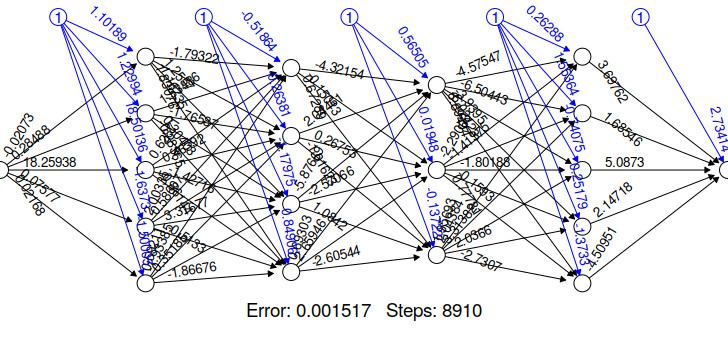<img src="ris1.jpeg">

In [10]:
xx<-data.frame(99.2)
View(data.frame(predict(nn,xx), sqrt(xx)))
#compute(nn,xx)
#sqrt(xx)

predict.nn..xx.,X99.2
<dbl>,<dbl>
9.9548,9.95992


Используем нейросеть на примере данных о гибеле на Титанике.

In [12]:
Tit<-read.csv("Titanic.csv")
View(Tit)

X,Class,Sex,Age,Survived,Freq
<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0
7,3rd,Female,Child,No,17
8,Crew,Female,Child,No,0
9,1st,Male,Adult,No,118


In [13]:
#Формирование обучающей и тестовой выборок
Titr<-data.frame(rank(Tit$Class), rank(Tit$Sex), rank(Tit$Age), rank(Tit$Survived), Tit$Freq)
colnames(Titr)<-c('Class','Sex','Age','Survived','Freq')
x<-c(1:32)
y<-sample(x,floor(32*0.8))
z<-setdiff(x,y)
D_teach<-Titr[y,]
D_test<-Titr[z,]

In [14]:
nn<-neuralnet(Survived~Class+Sex+Age+Freq,data=D_teach, hidden=c(5,4,3,5), linear.output=TRUE)

In [15]:
View(data.frame(predict(nn,D_teach), D_teach$Survived))

,predict.nn..D_teach.,D_teach.Survived
,<dbl>,<dbl>
31,24.500170,24.5
19,24.538982,24.5
15,8.499951,8.5
17,24.502361,24.5
8,16.500439,8.5
2,8.500033,8.5
20,16.499046,24.5
16,8.500454,8.5
14,8.499990,8.5


In [16]:
View(data.frame(predict(nn,D_test), D_test$Survived))

,predict.nn..D_test.,D_test.Survived
,<dbl>,<dbl>
3,24.544327,8.5
6,16.500359,8.5
7,24.500025,8.5
18,24.532381,24.5
22,24.501863,24.5
25,8.967382,24.5
32,27.716850,24.5
